## Ejemplo 3: Matriz de confusión

### 1. Objetivos:
    - Aprender a evaluar un modelo de clasificación binaria utilizando una matriz de confusión.
    
---
    
### 2. Desarrollo:

Entonces quedamos que una matriz de confusión se ve así:

In [1]:
from IPython.display import Image
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

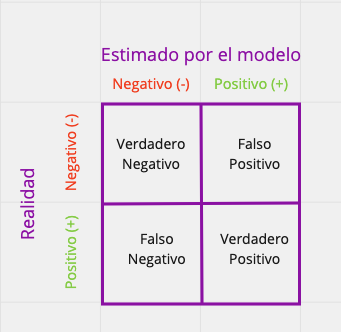

In [4]:
Image('Imgs/sesion_8-6.png')

Ésta es una matriz de 2x2, donde el eje x representa los resultados estimados por el modelo y el eje y representa la realidad (la clasificación que ya ha sido realizada en el dataset de prueba).

Como puedes ver, para cada uno de los dos ejes hay dos valores posibles: negativo y positivo. Negativo es la clasificación 0, el 'no'. Positivo es la clasificación 1, el `sí` (en nuestro ejemplo, positivo significa: 'el tumor es maligno').

Dependiendo de cuál es la etiqueta real (la que sabemos que es cierta) y cuál fue la que nuestro modelo estimó, hay 4 posibles categorías:

1. Verdadero Positivo (VP): Cuando la etiqueta real era positiva y nuestro modelo regresó un resultado positivo.
2. Falso Negativo (FN): Cuando la etiqueta real era positiva pero nuestro modelo regresó un resultado negativo.
3. Falso Positivo (FP): Cuando la etiqueta real era negativa pero nuestro modelo regresó un resultado positivo.
4. Verdadero Negativo (VN): Cuando la etiqueta real era negativa y nuestro modelo regresó un resultado negativo.

En estas 4 categorías se engloban todas las posibilidades. Obviamente queremos que la cantidad de Verdaderos Positivos y Verdaderos Negativos sea lo mayor posible. Volvamos a entrenar nuestro modelo para visualizar la matriz de confusión que le corresponde:

In [6]:
df = pd.read_csv('../Datasets/breast_cancer_wisconsin.csv', index_col=0)
df = df.drop(columns=['Unnamed: 32'])
df['diagnosis'] = df['diagnosis'].apply(lambda x: 1 if x == 'M' else 0)

In [7]:
X = df.drop(columns=['diagnosis'])
y = df['diagnosis']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
logreg = LogisticRegression(max_iter=10000)
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [10]:
y_pred = logreg.predict(X_test)

Listo, vamos a obtener nuestra matriz de confusión y visualizarla:

In [11]:
from sklearn import metrics

In [12]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

cnf_matrix

array([[98,  5],
       [ 4, 64]], dtype=int64)

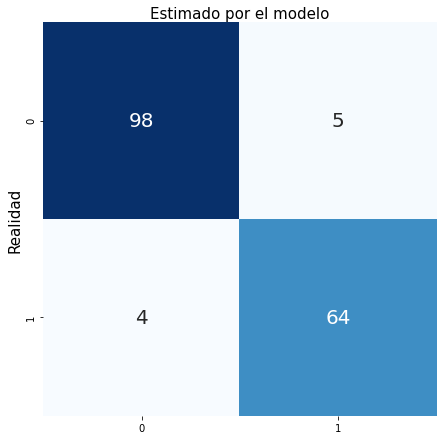

In [14]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots(figsize=(6, 6))
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="Blues" ,fmt='g', cbar=False, annot_kws={"size": 20})
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.ylabel('Realidad', fontsize=15, y=0.5)
plt.xlabel('Estimado por el modelo', fontsize=15);

Una vez obtenida nuestra matriz de confusión, podemos utilizar 4 medidas de evaluación llamadas: Precisión (Precision), Exactitud (Accuracy), Sensibilidad (Recall / Sensitivity) y Especificidad (Specificity). Cada una mide un aspecto de nuestro modelo:

1. Precisión: De todas las clasificaciones positivas que hicimos, ¿cuántas de ésas eran en realidad positivas?

`precision = VP / (VP + FP)`

2. Exactitud: Del total de clasificaciones que hicimos, ¿cuántas fueron clasificadas correctamente?

`exactitud = (VP + VN) / (VP + FN + FP + VN)`

3. Sensibilidad: De todas las clasificaciones positivas que había en realidad, ¿cuántas fueron clasificadas correctamente como positivas?

`sensibilidad = VP / (VP + FN)`

4. Especificidad: De todas las clasificaciones negativas que había en realidad, ¿cuántas fueron clasificadas correctamente como negativas?

`especificidad = VN / (VN + FP)`

Todas estas medidas pueden tener valores entre 0 y 1. Entre más cerca del 1 estén, mejor es nuestro modelo. En nuestro ejemplo, éstas son las medidas que obtuvimos:

In [10]:
tn, fp, fn, tp = cnf_matrix.ravel()

print("Precision:",metrics.precision_score(y_test, y_pred))
print("Exactitud:",metrics.accuracy_score(y_test, y_pred))
print("Sensibilidad:",metrics.recall_score(y_test, y_pred))
print("Especificidad:", tn / (tn + fp))

Precision: 0.9
Exactitud: 0.9298245614035088
Sensibilidad: 0.9
Especificidad: 0.9459459459459459


¡Nuestro modelo es bastante bueno!

Aprendamos ahora de qué manera podemos visualizar también el desempeño de un modelo de clasificación.